Steve Markstrom Mon Jan 13 10:39:30 MST 2020

This notebook contains simple examples to show how to use notebooks with xarray on ONMH output ncf files. These examples use the "onhm" python package that is availaible from https://github.com/nhm-usgs/pangeo/src/onhm

This notebook is a simple demonstration of how to get ONHM output variable values (and do stuff with them) for lists of HRU and Stream Segment IDs. These lists of IDs could come from lat/lon box pulls (as shown in onhm_array_demo_1 notebook)  or from "Bandit style" pulls that are based on the connectivity of the stream and HRU network (as shown in onhm_array_demo_2 notebook).


In [1]:
    # The python package "onhm" can be built from the source code at https://github.com/nhm-usgs/pangeo/src/onhm
    # These IDs come from notebook onhm_array_demo_1
    
    import onhm
    import numpy as np
    import matplotlib.pyplot as plt
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    hru_ids= [50471,50474,50482]
    
    seg_ids= [26236,26237,26238,28096]



In [2]:
    # Load up the xarray DataSet for the ONHM output files.
    # path = '/caldera/projects/usgs/water/impd/onhm/historical/output/'
    ds_out = onhm.reader.get_DataSet('/work/markstro/operat/setup/test/NHM-PRMS_CONUS/output/', ".nc")
    print(ds_out)

<xarray.Dataset>
Dimensions:              (hruid: 109951, segid: 56460, time: 14569)
Coordinates:
  * hruid                (hruid) int32 1 2 3 4 5 ... 109948 109949 109950 109951
  * time                 (time) datetime64[ns] 1979-10-01T05:00:00 ... 2019-08-20T05:00:00
  * segid                (segid) int32 1 2 3 4 5 ... 56457 56458 56459 56460
Data variables:
    hru_lat              (hruid) float64 ...
    hru_lon              (hruid) float64 ...
    dunnian_flow         (time, hruid) float64 ...
    newsnow_out          object None
    intcp_on             (time, hruid) float64 ...
    dprst_stor_hru       (time, hruid) float64 ...
    hru_streamflow_out   (time, hruid) float64 ...
    hru_intcpevap        (time, hruid) float64 ...
    snow_evap            (time, hruid) float64 ...
    dprst_evap_hru       (time, hruid) float64 ...
    pk_temp              (time, hruid) float64 ...
    soil_moist_tot       (time, hruid) float64 ...
    perv_actet           (time, hruid) float64 ...


The next few cells show how to get the time series of average PET and AET for the selected HRUs.

In [3]:
ds_pet = ds_out['potet'].sel(hruid=hru_ids)
print(ds_pet)

<xarray.DataArray 'potet' (time: 14569, hruid: 3)>
array([[4.30276, 4.70916, 5.32892],
       [4.27736, 4.66598, 5.8166 ],
       [3.8608 , 4.2291 , 4.24434],
       ...,
       [5.4483 , 6.3119 , 6.0452 ],
       [6.82752, 7.78256, 7.4803 ],
       [6.85038, 7.82066, 7.4549 ]])
Coordinates:
  * hruid    (hruid) int32 50471 50474 50482
  * time     (time) datetime64[ns] 1979-10-01T05:00:00 ... 2019-08-20T05:00:00
Attributes:
    long_name:      Potential ET for each HRU
    standard_name:  potet
    units:          mm


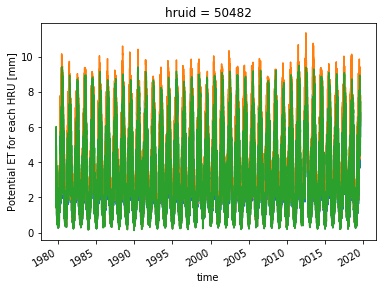

In [4]:
# Plot upt the time series of PET for each HRU
dim_size = ds_pet.values.shape
num_ts = dim_size[0]
num_hru = dim_size[1]
    
for ii in range(num_hru):
    ds_pet[:,ii].plot()

Too many years to see what is going on, cut out one year's worth.

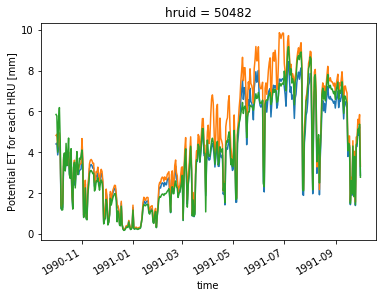

In [5]:
# Try again with smaller temporal slice
ds_pet = ds_pet.sel(time=slice('1990-10-01', '1991-09-30'))

dim_size = ds_pet.values.shape
num_ts = dim_size[0]
num_hru = dim_size[1]
    
for ii in range(num_hru):
    ds_pet[:,ii].plot()

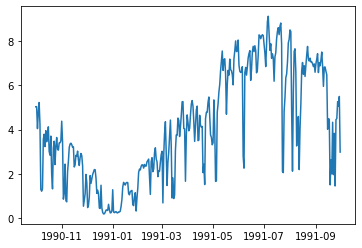

In [6]:
    # The means of the HRU values, for each time step, respectively
    pet_mean = np.zeros(num_ts)
    for ii in range(0, num_hru):
        pet_mean = np.add(pet_mean, ds_pet.values[:,ii])
    pet_mean = pet_mean / num_hru
    
    # Need to use matplotlib call directly because the variable mean is a numpy array, not an xarray DataArray
    plt.plot(ds_pet.coords['time'], pet_mean)

Do the same thing again, except with actual ET.

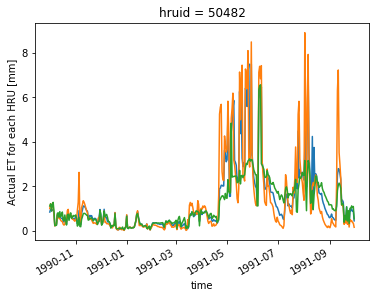

In [7]:
ds_aet = ds_out['hru_actet'].sel(hruid=hru_ids, time=slice('1990-10-01', '1991-09-30'))
dim_size = ds_aet.values.shape
num_ts = dim_size[0]
num_hru = dim_size[1]

for ii in range(num_hru):
    ds_aet[:,ii].plot()

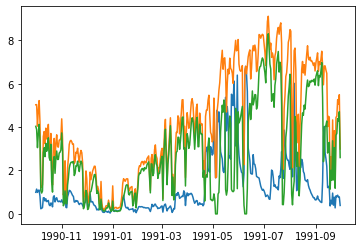

In [12]:
aet_mean = np.zeros(num_ts)
for ii in range(0, num_hru):
    aet_mean = np.add(aet_mean, ds_aet.values[:,ii])
aet_mean = aet_mean / num_hru
deficite = np.subtract(pet_mean, aet_mean)

plt.plot(ds_aet.coords['time'], aet_mean)
plt.plot(ds_pet.coords['time'], pet_mean)
plt.plot(ds_pet.coords['time'], deficite)